# Requirements

In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [ ]:
data=  pd.read_csv('/content/user_behavior_data.csv.csv')

In [ ]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1.0,Google Pixel 5,0.0,393.0,6.4,1872.0,67.0,1122.0,40.0,1.0,4.0
1,2.0,OnePlus 9,0.0,268.0,4.7,1331.0,42.0,944.0,47.0,0.0,3.0
2,3.0,Xiaomi Mi 11,0.0,154.0,4.0,761.0,32.0,NaN,42.0,1.0,2.0
3,4.0,Google Pixel 5,0.0,239.0,4.8,1676.0,56.0,871.0,20.0,1.0,3.0
4,5.0,iPhone 12,1.0,187.0,4.3,1367.0,58.0,988.0,31.0,0.0,3.0


Preprocess the input and the output variables appropriately.

In [ ]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [ ]:
data['Operating System'] = encoder.fit_transform(data['Operating System'])

In [ ]:
data['Operating System'] = data['Operating System'].replace(2, None)

In [ ]:
data['Device Model'] = encoder.fit_transform(data['Device Model'])

Explore the dataset using visualizations of your choice.

ValueError: num must be an integer with 1 <= num <= 20, not 21

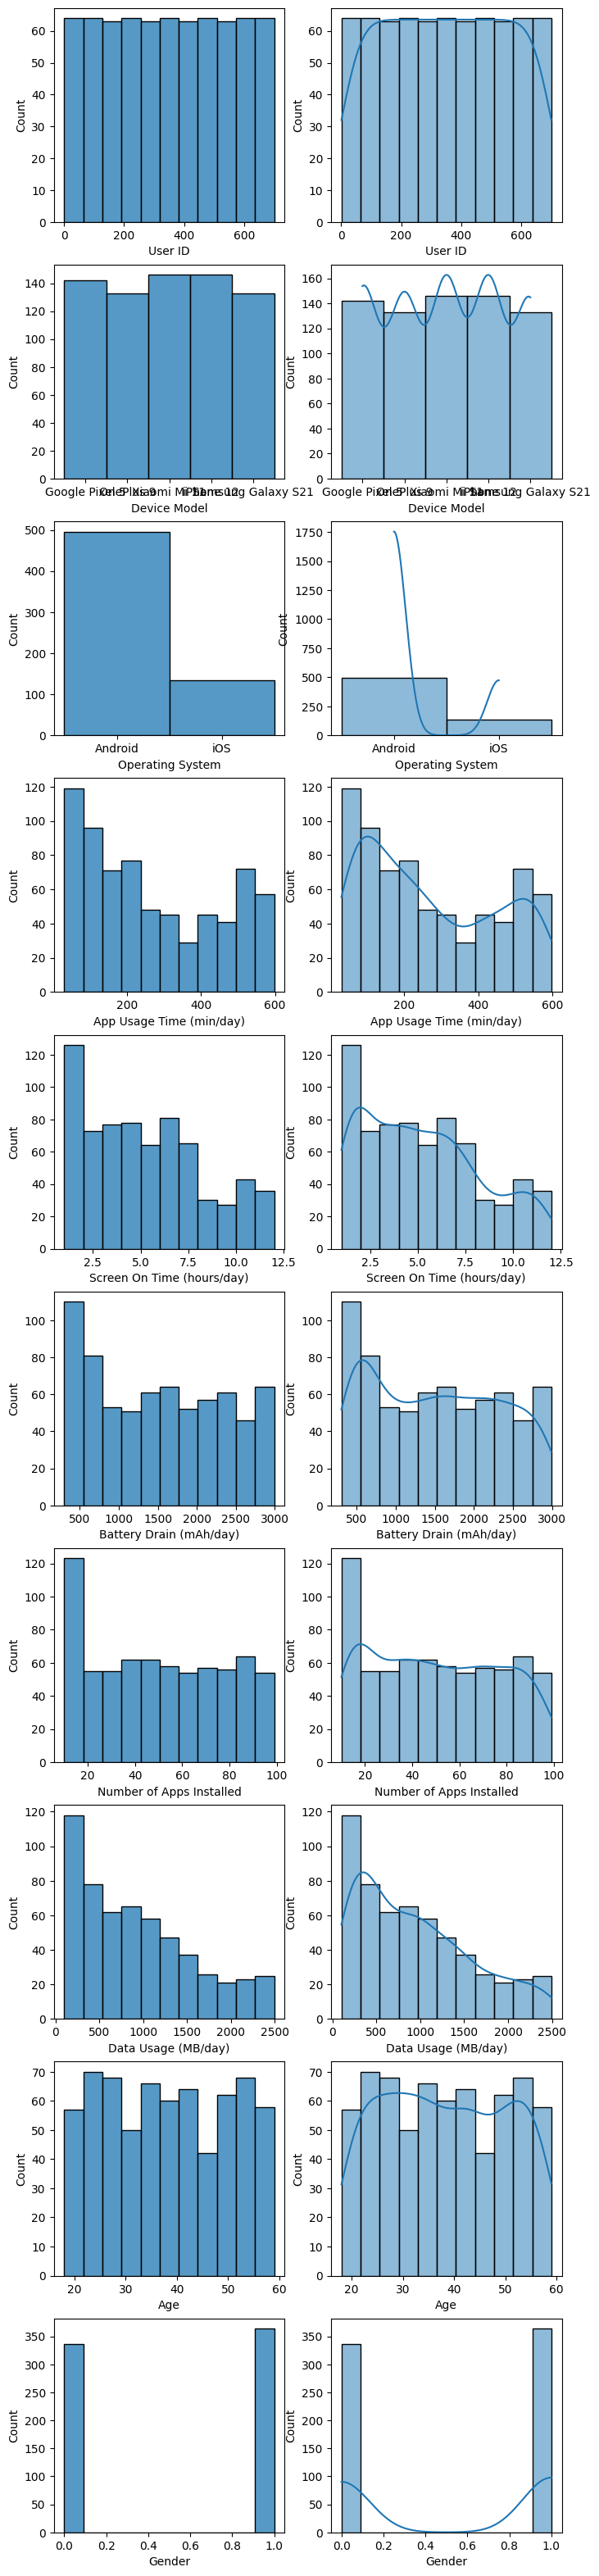

In [ ]:

fig = plt.figure(figsize=(8,40))
for col,i in zip( data.columns,range(0,len(data.columns))):
  axis = fig.add_subplot(10,2,i*2+1)
  sns.histplot(data=data,x=col,ax=axis)

  axis = fig.add_subplot(10,2,i*2+2)
  sns.histplot(data=data,x=col,ax=axis,kde=True)
fig.tight_layout()
plt.show()

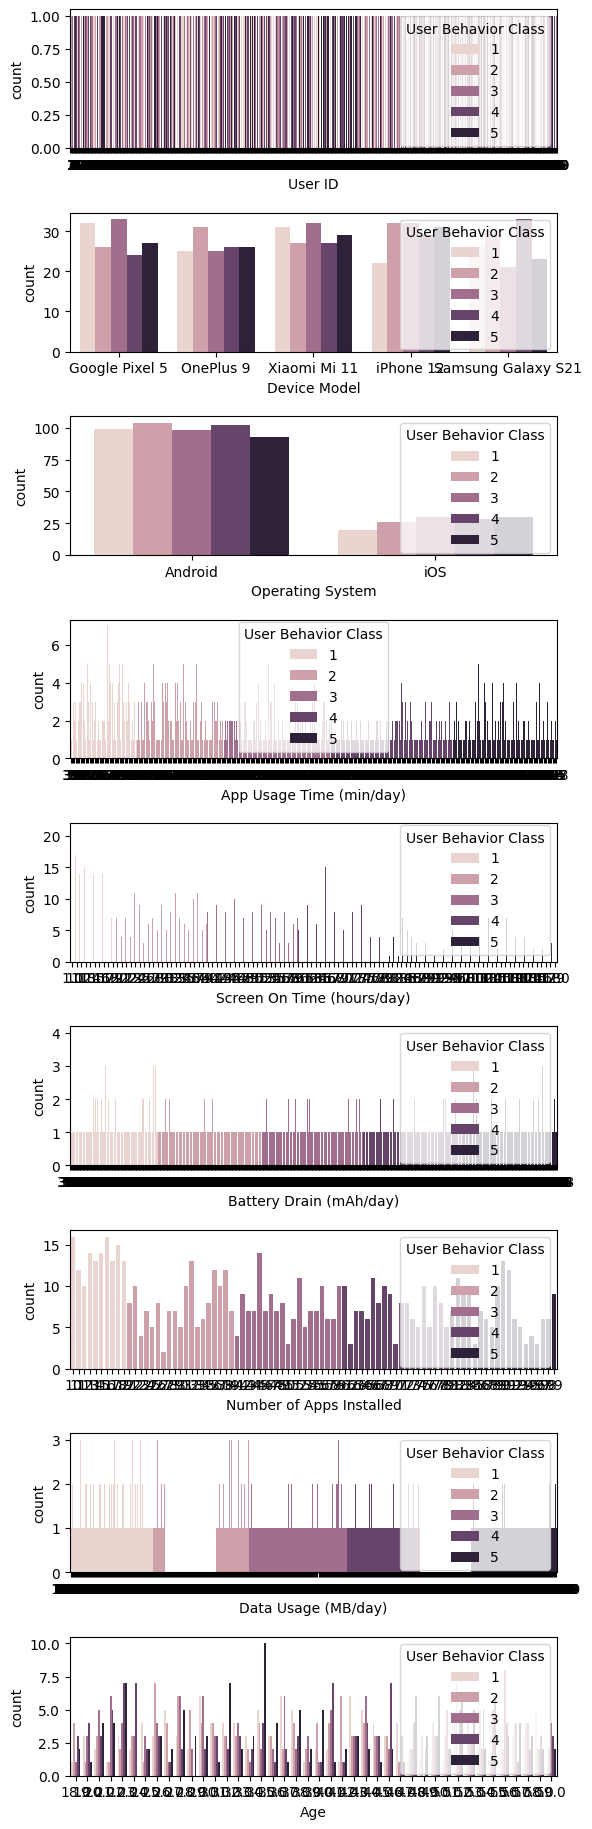

In [ ]:
features = list(data.columns)
features.remove("User Behavior Class")
fig=  plt.figure(figsize=(6,20))
for col, i in zip(features,range(1,10)):
  axis = fig.add_subplot(10,1,i)
  sns.countplot(data=data,x=col,hue='User Behavior Class',ax=axis)

fig.tight_layout()
plt.show()

<Axes: >

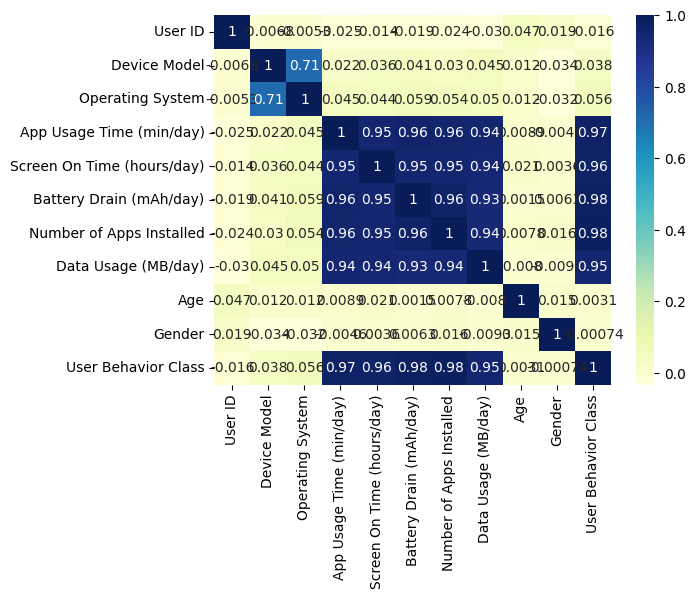

In [ ]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

Check if the dataset is balanced.

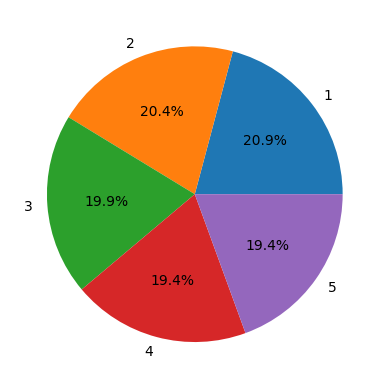

In [ ]:
plt.pie(data['User Behavior Class'].value_counts(),labels=['1','2','3','4','5'],autopct='%1.1f%%')
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
data.isna().sum()

,0
User ID,0
Device Model,0
Operating System,70
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,0
Gender,0


In [ ]:
data.Age.fillna(value=data.Age.median(),inplace=True)

<ipython-input-42-714b69813035>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(value=data.Age.median(),inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [ ]:
scaler = MinMaxScaler()
imputer = KNNImputer()
no_values = data[['Operating System','Device Model']]
no_values = scaler.fit_transform(no_values)
data[['Operating System','Device Model']] = scaler.inverse_transform(imputer.fit_transform(no_values))

In [ ]:
no_values = data[['Screen On Time (hours/day)'	,'Battery Drain (mAh/day)','Number of Apps Installed',	'Data Usage (MB/day)']]
no_values = scaler.fit_transform(no_values)
data[['Screen On Time (hours/day)'	,'Battery Drain (mAh/day)','Number of Apps Installed',	'Data Usage (MB/day)']] = scaler.inverse_transform(imputer.fit_transform(no_values))

In [ ]:
data.isna().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
data.drop('User ID',axis=1,inplace=True)

x = data.drop('User Behavior Class',axis=1)
y = data['User Behavior Class']

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size =0.2, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_x_scaled,train_y)

DecisionTreeClassifier(random_state=42)

Use the trained model to make predictions for the test set.

In [ ]:
pred_y =  model.predict(test_x_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


<Axes: >

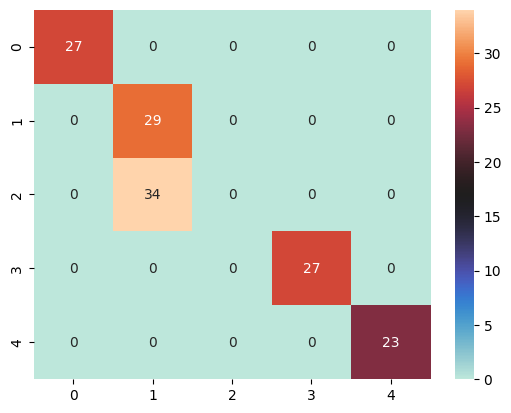

In [ ]:
sns.heatmap(confusion_matrix(test_y,pred_y),cmap='icefire',annot=True)

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



Assess the performance of the model by using different classification metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
x = data.drop('User Behavior Class',axis=1)
y = data['User Behavior Class']

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size =0.1, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(train_x_scaled,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_estimator = grid_search.best_estimator_

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
pred_y = best_estimator.predict(test_x_scaled)

<Axes: >

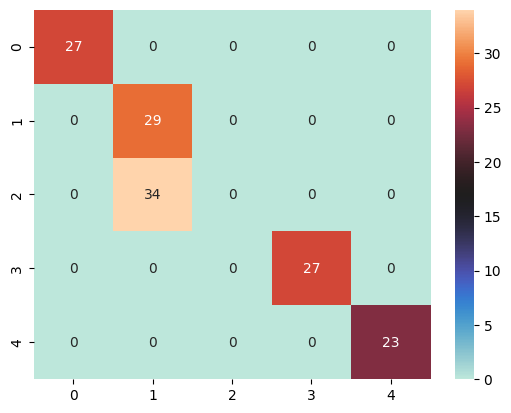

In [ ]:
sns.heatmap(confusion_matrix(test_y,pred_y),cmap='icefire',annot=True)

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.46      1.00      0.63        29
           3       0.00      0.00      0.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           0.76       140
   macro avg       0.69      0.80      0.73       140
weighted avg       0.65      0.76      0.68       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Write your code here. Add as many boxes as you need.